In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [5]:
train.duplicated().sum()

0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [7]:
train['churn'] = train['churn'].replace(['no','yes'],[0,1])

In [8]:
train.corr()['churn']

account_length                   0.019378
number_vmail_messages           -0.100347
total_day_minutes                0.215272
total_day_calls                  0.011640
total_day_charge                 0.215263
total_eve_minutes                0.078855
total_eve_calls                 -0.006817
total_eve_charge                 0.078852
total_night_minutes              0.046647
total_night_calls               -0.012699
total_night_charge               0.046641
total_intl_minutes               0.055186
total_intl_calls                -0.034334
total_intl_charge                0.055177
number_customer_service_calls    0.221220
churn                            1.000000
Name: churn, dtype: float64

In [9]:
train['total_minutes']= (train['total_day_minutes']**2 + train['total_eve_minutes']**2 + train['total_night_minutes']**2)**0.5
train['total_calls'] = (train['total_day_calls']**2 + train['total_eve_calls']**2 + train['total_night_calls']**2)**0.5
train['total_charge'] = (train['total_day_charge']**2 + train['total_eve_charge']**2 + train['total_night_charge']**2)**0.5

In [10]:
train.corr()['churn']

account_length                   0.019378
number_vmail_messages           -0.100347
total_day_minutes                0.215272
total_day_calls                  0.011640
total_day_charge                 0.215263
total_eve_minutes                0.078855
total_eve_calls                 -0.006817
total_eve_charge                 0.078852
total_night_minutes              0.046647
total_night_calls               -0.012699
total_night_charge               0.046641
total_intl_minutes               0.055186
total_intl_calls                -0.034334
total_intl_charge                0.055177
number_customer_service_calls    0.221220
churn                            1.000000
total_minutes                    0.202313
total_calls                     -0.001806
total_charge                     0.237869
Name: churn, dtype: float64

In [11]:
import math
train['total_minutes'] = (train['total_minutes']**2 + train['total_intl_minutes']**2)**0.5
train['total_calls'] = (train['total_calls']**2 + train['total_intl_calls']**2)**0.5
train['total_charge'] = (train['total_charge']**2 + train['total_intl_charge']**2)**0.5

In [12]:
train.corr()['churn']

account_length                   0.019378
number_vmail_messages           -0.100347
total_day_minutes                0.215272
total_day_calls                  0.011640
total_day_charge                 0.215263
total_eve_minutes                0.078855
total_eve_calls                 -0.006817
total_eve_charge                 0.078852
total_night_minutes              0.046647
total_night_calls               -0.012699
total_night_charge               0.046641
total_intl_minutes               0.055186
total_intl_calls                -0.034334
total_intl_charge                0.055177
number_customer_service_calls    0.221220
churn                            1.000000
total_minutes                    0.202432
total_calls                     -0.001867
total_charge                     0.238558
Name: churn, dtype: float64

In [13]:
train.drop(columns=["total_day_minutes","total_day_calls","total_day_charge","total_eve_minutes","total_eve_calls","total_eve_charge","total_night_minutes","total_night_calls","total_night_charge","total_intl_minutes","total_intl_calls","total_intl_charge"],inplace=True)

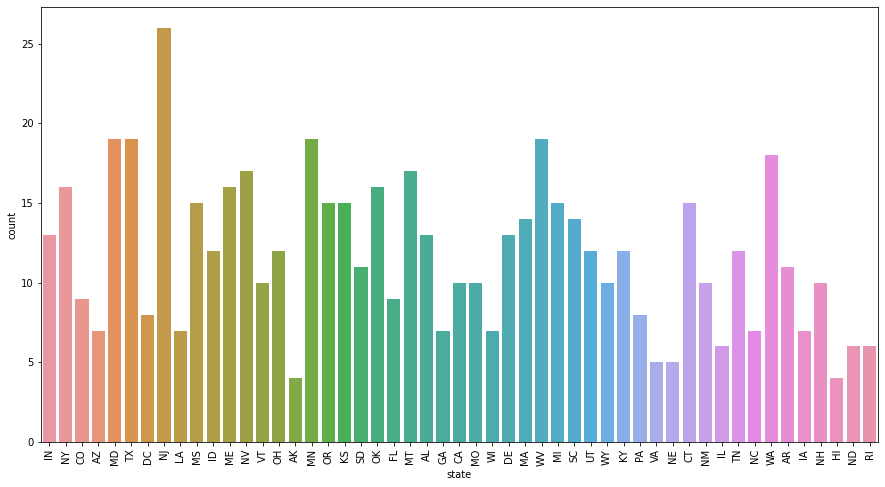

In [14]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,8))
sns.countplot(train[train['churn']==1]['state'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='number_vmail_messages', ylabel='Density'>

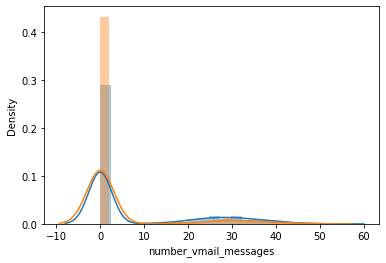

In [15]:
sns.distplot(train[train['churn']==0]['number_vmail_messages'])
sns.distplot(train[train['churn']==1]['number_vmail_messages'])

In [16]:
state_trans = pd.DataFrame(train[train['churn']==1]['state'].value_counts()/train['state'].value_counts()*100)

In [17]:
state_trans.reset_index(inplace=True)

In [18]:
state_trans.columns=['state','value']

In [19]:
train['state_value']=state_trans['value']

In [20]:
train.drop(columns=['total_calls','state_value'],inplace=True)

In [21]:
x=[]
for i in range(0,train.shape[0]):
    x.append(state_trans[state_trans['state']==train.iloc[i]['state']]['value'].iloc[0])

In [22]:
train['state_value']=x

In [23]:
train['international_plan']=train['international_plan'].replace(['no','yes'],[0,1])
train['voice_mail_plan']=train['voice_mail_plan'].replace(['no','yes'],[0,1])

In [24]:
sum(train[train['international_plan']==1]['churn'].value_counts())

396

In [25]:
def prob_count(df,feature):
    print('Prob. of customers not churn having {} :'.format(train[train[feature]==1]['churn'].value_counts()[0]/sum(train[train[feature]==1]['churn'].value_counts())))
    print('Prob. of customers churn having {} :'.format(train[train[feature]==1]['churn'].value_counts()[1]/sum(train[train[feature]==1]['churn'].value_counts())))
    print('Prob. of customers not churn not having {} :'.format(train[train[feature]==1]['churn'].value_counts()[0]/sum(train[train[feature]==0]['churn'].value_counts())))
    print('Prob. of customers churn not having {} :'.format(train[train[feature]==1]['churn'].value_counts()[1]/sum(train[train[feature]==0]['churn'].value_counts())))

In [26]:
prob_count(train,'international_plan')

Prob. of customers not churn having 0.5782828282828283 :
Prob. of customers churn having 0.4217171717171717 :
Prob. of customers not churn not having 0.05941878567721848 :
Prob. of customers churn not having 0.04333160352880124 :


In [27]:
prob_count(train,'voice_mail_plan')

Prob. of customers not churn having 0.9262589928057554 :
Prob. of customers churn having 0.0737410071942446 :
Prob. of customers not churn not having 0.3282345442957298 :
Prob. of customers churn not having 0.026131293817718292 :


In [28]:
print('Prob. of having voice_mail_plan is ',train['voice_mail_plan'].value_counts()[1]/sum(train['voice_mail_plan'].value_counts()))
print('Prob. of not having voice_mail_plan is ',train['voice_mail_plan'].value_counts()[0]/sum(train['voice_mail_plan'].value_counts()))

Prob. of having voice_mail_plan is  0.2616470588235294
Prob. of not having voice_mail_plan is  0.7383529411764705


In [29]:
print('Prob. of having international_plan is ',train['international_plan'].value_counts()[1]/sum(train['international_plan'].value_counts()))
print('Prob. of not having internatinal_plan is ',train['international_plan'].value_counts()[0]/sum(train['international_plan'].value_counts()))

Prob. of having international_plan is  0.09317647058823529
Prob. of not having internatinal_plan is  0.9068235294117647


In [30]:
train[train['churn']==0]['number_vmail_messages'].value_counts()/sum(train[train['churn']==1]['number_vmail_messages'].value_counts())

0     4.386288
31    0.107023
24    0.091973
28    0.085284
27    0.085284
29    0.081940
26    0.080268
33    0.080268
30    0.075251
32    0.073579
25    0.073579
23    0.066890
22    0.060201
39    0.056856
21    0.056856
34    0.055184
38    0.053512
37    0.051839
35    0.051839
20    0.045151
36    0.045151
19    0.040134
40    0.035117
17    0.026756
41    0.025084
18    0.023411
16    0.023411
43    0.021739
42    0.021739
15    0.018395
12    0.016722
45    0.015050
14    0.011706
46    0.011706
44    0.008361
47    0.006689
10    0.006689
49    0.005017
13    0.005017
50    0.003344
48    0.003344
6     0.003344
11    0.003344
8     0.003344
4     0.001672
52    0.001672
Name: number_vmail_messages, dtype: float64

In [31]:
x=[]
for i in range(0,train.shape[0]):
    if train.iloc[i]['number_vmail_messages']==0:
        x.append(2)
    elif train.iloc[i]['number_vmail_messages']%2==0:
        x.append(1)
    else:
        x.append(0)

In [32]:
train['mail_wise_rank']=x

In [33]:
train[train['churn']==1]['number_customer_service_calls'].value_counts()/sum(train[train['churn']==1]['number_customer_service_calls'].value_counts())

1    0.277592
2    0.170569
0    0.162207
4    0.153846
3    0.105351
5    0.081940
6    0.031773
7    0.011706
9    0.003344
8    0.001672
Name: number_customer_service_calls, dtype: float64

In [34]:
x=[]
for i in range(0,train.shape[0]):
    if train.iloc[i]['number_customer_service_calls'] in [0,1,2,3,4]:
        x.append(1)
    else:
        x.append(0)

In [35]:
train['csc_wise_rank']=x

In [36]:
train.drop(columns=['state','number_customer_service_calls','number_vmail_messages'],inplace=True)

In [37]:
train.drop(columns=['account_length','area_code'],inplace=True)

In [38]:
X = train.drop(columns=['churn'])
y = train['churn']

In [39]:
X

,international_plan,voice_mail_plan,total_minutes,total_charge,state_value,mail_wise_rank,csc_wise_rank
0,0,1,359.502239,34.287283,12.631579,1,1
1,0,0,317.049838,43.391254,27.083333,2,1
2,1,0,363.710242,51.962925,12.631579,2,1
3,1,0,291.230836,32.254437,20.512821,2,1
4,0,1,462.945461,48.463577,15.730337,1,1
...,...,...,...,...,...,...,...
4245,0,0,375.058809,39.423740,21.250000,2,1
4246,0,0,289.248232,33.446623,13.669065,2,1
4247,0,0,288.340979,33.891949,8.750000,2,1
4248,0,1,440.326867,46.384345,5.194805,1,1


In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [41]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,lr.predict(X_test))

0.8611764705882353

In [43]:
clf1 = DecisionTreeClassifier(max_depth=32,max_features=7,max_leaf_nodes=40,min_samples_leaf=5,random_state=0)

In [44]:
clf1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=32, max_features=7, max_leaf_nodes=40,
                       min_samples_leaf=5, random_state=0)

In [45]:
accuracy_score(Y_test,clf1.predict(X_test))

0.9058823529411765

In [46]:
clf2=RandomForestClassifier(n_estimators=250,random_state=0,max_depth=32,max_leaf_nodes=25,min_samples_leaf=5)

In [47]:
# params = {
#     'n_estimators':[100,150,200,250,300],
#     'max_depth':[1,3,7,10,15,20,25],
#     'min_samples_leaf':[2,3,4,5,7,10,15,20,25],
#     'max_leaf_nodes':[2,3,4,5,6,7,10,13,15,20],
#     'max_features':[1,2,3,4,5,6,7]
# }
# Gscv = GridSearchCV(clf2,param_grid=params,cv=5,scoring=accuracy_score)

In [48]:
# Gscv.fit(X_train,Y_train)

In [49]:
clf2.fit(X_train,Y_train)
accuracy_score(Y_test,clf2.predict(X_test))

0.908235294117647

In [50]:
clf3 = AdaBoostClassifier()
clf3.fit(X_train,Y_train)

AdaBoostClassifier()

In [51]:
accuracy_score(Y_test,clf3.predict(X_test))

0.88

In [52]:
clf4 = GradientBoostingClassifier()
clf4.fit(X_train,Y_train)

GradientBoostingClassifier()

In [53]:
accuracy_score(Y_test,clf4.predict(X_test))

0.9070588235294118

In [54]:
estimators = [('rf',clf2),('gb',clf4),('adb',clf3)]
clf5 = VotingClassifier(estimators=estimators,weights=[3,1,1])
clf5.fit(X_train,Y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=32,
                                                     max_leaf_nodes=25,
                                                     min_samples_leaf=5,
                                                     n_estimators=250,
                                                     random_state=0)),
                             ('gb', GradientBoostingClassifier()),
                             ('adb', AdaBoostClassifier())],
                 weights=[3, 1, 1])

In [55]:
accuracy_score(Y_test,clf5.predict(X_test))

0.908235294117647

In [56]:
import tensorflow as tf

In [57]:
model = tf.keras.models.Sequential()

In [58]:
model.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [59]:
model.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [60]:
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [61]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [62]:
model.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
107/107 [==============================] - 8s 10ms/step - loss: 6.9379 - accuracy: 0.8632
Epoch 2/100
107/107 [==============================] - 1s 8ms/step - loss: 3.2924 - accuracy: 0.8632
Epoch 3/100
107/107 [==============================] - 1s 9ms/step - loss: 1.0182 - accuracy: 0.8632
Epoch 4/100
107/107 [==============================] - 1s 7ms/step - loss: 0.4315 - accuracy: 0.8632
Epoch 5/100
107/107 [==============================] - 1s 6ms/step - loss: 0.4342 - accuracy: 0.8632
Epoch 6/100
107/107 [==============================] - 1s 6ms/step - loss: 0.4302 - accuracy: 0.8632
Epoch 7/100
107/107 [==============================] - 1s 6ms/step - loss: 0.4296 - accuracy: 0.8632
Epoch 8/100
107/107 [==============================] - 1s 5ms/step - loss: 0.4305 - accuracy: 0.8632
Epoch 9/100
107/107 [==============================] - 1s 5ms/step - loss: 0.4292 - accuracy: 0.8632
Epoch 10/100
107/107 [==============================] - 1s 6ms/step - loss: 0.4292 - accur

In [63]:
y_pred=model.predict(X_test)

27/27 [==============================] - 1s 6ms/step


In [64]:
y_pred=np.where(y_pred>0.1,1,0)

In [65]:
y_pred=y_pred.ravel()

In [66]:
sum((y_pred-Y_test)**2)/len(y_pred)

0.6529411764705882

In [67]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [68]:
linear_reg.fit(X_train,Y_train)

LinearRegression()

In [69]:
y_pred1=linear_reg.predict(X_test)

In [70]:
y_pred1=np.where(y_pred1>0.5045,1,0)

In [71]:
y_pred1=y_pred1.ravel()

In [72]:
accuracy_score(Y_test,y_pred1)

0.8611764705882353

In [73]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
mnb=MultinomialNB()
gb=GaussianNB()

In [74]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [75]:
accuracy_score(Y_test,mnb.predict(X_test))

0.8458823529411764

In [76]:
gb.fit(X_train,Y_train)

GaussianNB()

In [77]:
accuracy_score(Y_test,gb.predict(X_test))

0.8682352941176471

In [78]:
state_trans.to_csv('state_value.csv')

In [79]:
import pickle as pk

In [84]:
with open('clf2','wb') as f:
    pk.dump(clf2,f)

In [85]:
clf2.predict([[0,1,359.5,34.2,12.63,1,1]])

array([0], dtype=int64)

In [86]:
X_test

,international_plan,voice_mail_plan,total_minutes,total_charge,state_value,mail_wise_rank,csc_wise_rank
2268,0,0,378.808844,39.153096,15.151515,2,1
585,0,0,350.657126,37.214683,17.241379,2,1
3857,0,0,353.276535,50.251120,21.250000,2,1
1767,0,1,368.713547,42.659699,11.940299,0,1
3720,0,1,396.883522,38.179851,11.940299,0,1
...,...,...,...,...,...,...,...
2198,0,1,366.165345,36.818145,6.849315,1,1
3786,1,0,325.894922,36.304951,17.241379,2,1
2660,0,0,296.813527,28.415008,6.557377,2,1
153,0,0,262.347994,29.071441,16.666667,2,1


In [87]:
state_trans

,state,value
0,AK,6.557377
1,AL,12.871287
2,AR,15.492958
3,AZ,9.090909
4,CA,25.641026
5,CO,11.250000
6,CT,17.045455
7,DC,11.111111
8,DE,16.250000
9,FL,11.842105
